# Heart Attack Prediction

In [410]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## Reading CSV File

In [411]:
df=pd.read_csv("H:\\PythonDataAnalysis\\Datasets\\heartdisease.csv")
df.rename(columns=lambda x: x.strip(),inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


## Data Preprocessing

In [412]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [413]:
df.replace('?',np.nan,inplace=True)  #replacing ? with nan
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
289,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1
293,65,1,4,130,275,0,1,115,1,1.0,2,NaN,NaN,1


In [414]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64

In [415]:
df.drop(['slope','ca','thal'],axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [416]:
#converting data type of columns from string to float 
df[['trestbps','chol','fbs','restecg','thalach']]=df[['trestbps','chol','fbs','restecg','thalach']].astype(np.float64,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0,0.0,0


In [417]:
# Filling missiing value with mean
df['chol']=df['chol'].where(df['chol'].notna(),df['chol'].mean(),axis=0)
df[['chol','trestbps']]=df[['chol','trestbps']].replace(np.nan,0)
df=df.dropna()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.000000,0.0,2.0,185.0,0,0.0,0
1,29,1,2,120.0,243.000000,0.0,0.0,160.0,0,0.0,0
2,29,1,2,140.0,250.848708,0.0,0.0,170.0,0,0.0,0
3,30,0,1,170.0,237.000000,0.0,1.0,170.0,0,0.0,0
4,31,0,2,100.0,219.000000,0.0,1.0,150.0,0,0.0,0


In [418]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,num
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,47.820423,0.732394,2.992958,132.725352,248.987748,0.070423,0.214789,139.193662,0.589085,0.362676
std,7.860947,0.443492,0.962157,17.761731,62.945390,0.256309,0.460058,23.841226,0.915775,0.481621
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,275.250000,0.000000,0.000000,155.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,5.000000,1.000000


## Analysis

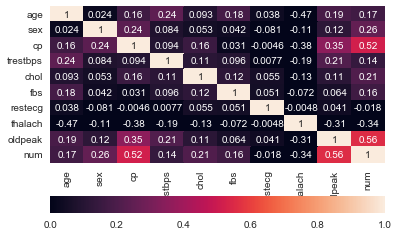

In [419]:
p=sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True,cbar=True ,cbar_kws={"orientation": "horizontal"})

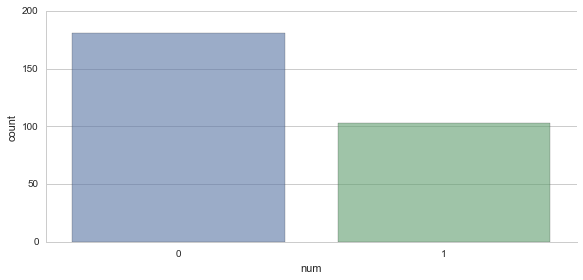

In [446]:
#number of peoples suffering heart Attack
with sns.axes_style("whitegrid"):
    sns.factorplot("num", data=df, aspect=2.0, kind='count',alpha=0.6,label=["jkjkk"])

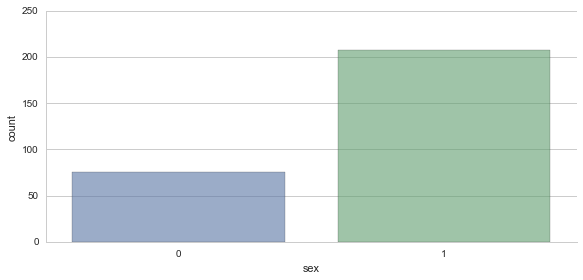

In [445]:
#number of males and females
with sns.axes_style("whitegrid"):
    sns.factorplot("sex", data=df, aspect=2.0, kind='count',alpha=0.6)

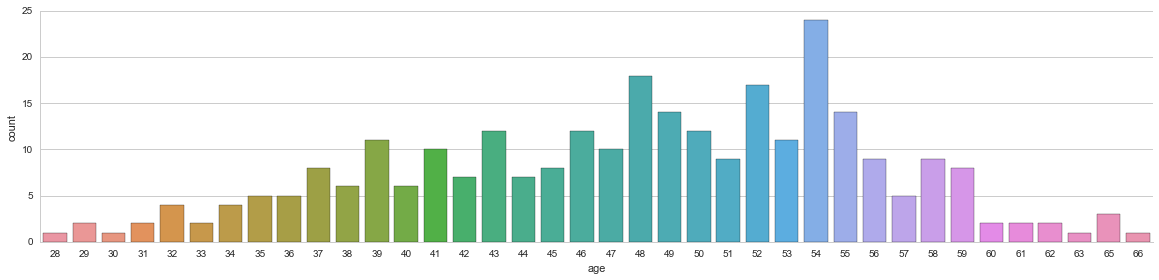

In [422]:
#number of peoples of agewise
with sns.axes_style("whitegrid"):
    sns.factorplot("age", data=df, aspect=4.0, kind='count')

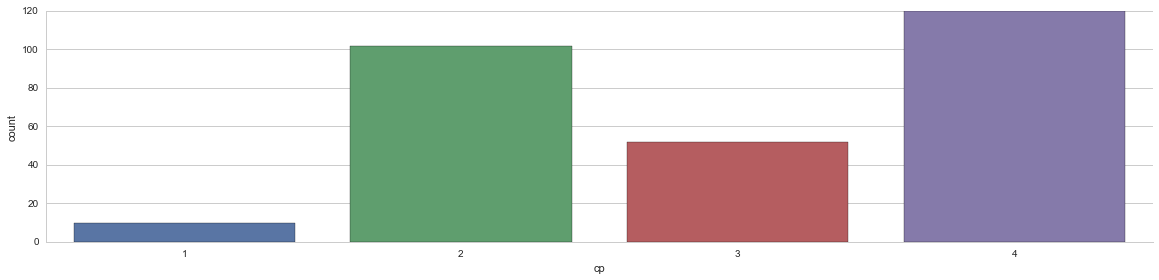

In [423]:
#number of peoples with type of chest pain
with sns.axes_style("whitegrid"):
    sns.factorplot("cp", data=df, aspect=4.0, kind='count')

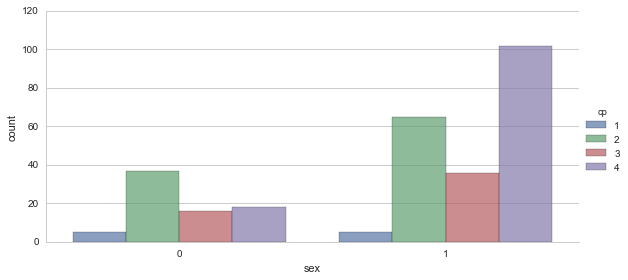

In [424]:
#cp and sex 
with sns.axes_style("whitegrid"):
    sns.factorplot("sex", data=df, aspect=2.0, kind='count',hue='cp',alpha=0.7)

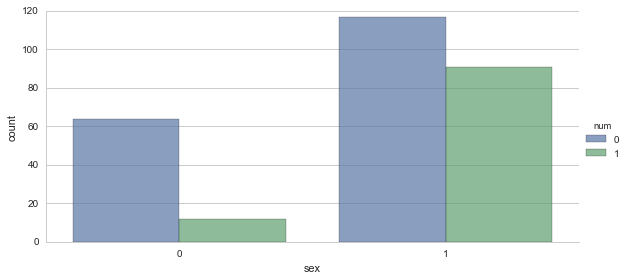

In [425]:
#cp and sex 
with sns.axes_style("whitegrid"):
    sns.factorplot("sex", data=df, aspect=2.0, kind='count',hue='num',alpha=0.7)

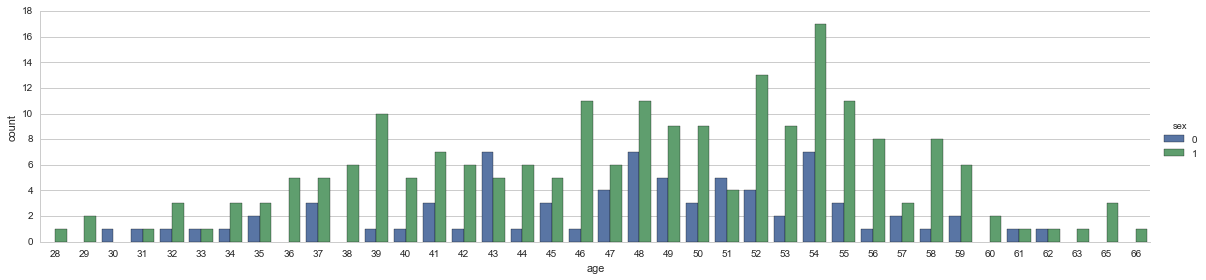

In [426]:
#age and sex
with sns.axes_style("whitegrid"):
    sns.factorplot("age", data=df, aspect=4.0, kind='count',hue="sex",)

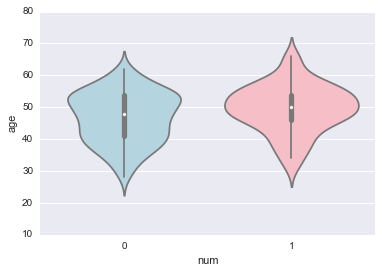

In [427]:
#age and num
sns.violinplot("num", "age", data=df,
               palette=["lightblue", "lightpink"]);

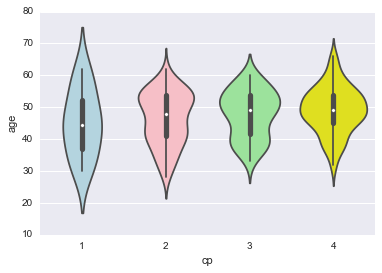

In [428]:
sns.violinplot("cp", "age", data=df,
               palette=["lightblue", "lightpink","lightgreen","yellow"]);

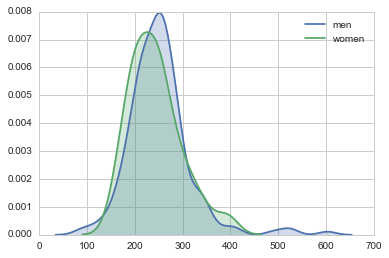

In [429]:
#resting blood pressure of male and females
with sns.axes_style("whitegrid"):
    sns.kdeplot(df.chol[df.sex==1], label='men', shade=True)
    sns.kdeplot(df.chol[df.sex==0], label='women', shade=True)


## Train data

In [430]:
X=df.drop('num',axis=1)
Y=df['num']

In [431]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

## Linear Regression

In [432]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression().fit(X_train,y_train)
prediction=linear_regression.predict(X_test)
linear_regression_score_test=linear_regression.score(X_test,y_test)
linear_regression_score_train=linear_regression.score(X_train,y_train)
linear_regression_score_test,linear_regression_score_train

(0.48766163621048675, 0.4908379265603632)

In [433]:
coeff_df=pd.DataFrame(linear_regression.coef_,X.columns,columns=['coefficient'])
coeff_df

,coefficient
age,-0.001397
sex,0.104783
cp,0.145175
trestbps,-0.000253
chol,0.000492
fbs,0.160585
restecg,-0.076401
thalach,-0.001202
exang,0.216251
oldpeak,0.153282


In [434]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,classification_report
print('r square :',r2_score(y_test,prediction))
print('Mean Absolute Error:', mean_squared_error(y_test, prediction))  
print('Mean Squared Error:', mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

r square : 0.48766163621048675
Mean Absolute Error: 0.12331443535961814
Mean Squared Error: 0.12331443535961814
Root Mean Squared Error: 0.35116155165339236


In [435]:
prediction=np.round(abs(prediction))
classification_report(y_test,prediction)

'             precision    recall  f1-score   support\n\n          0       0.86      0.88      0.87        34\n          1       0.82      0.78      0.80        23\n\navg / total       0.84      0.84      0.84        57\n'

In [436]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[30,  4],
       [ 5, 18]], dtype=int64)

## Logistic Regression

In [437]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression().fit(X_train,y_train)
prediction_lr=logistic_regression.predict(X_test)
logistic_regression_score_test=logistic_regression.score(X_test,y_test)
logistic_regression_score_train=logistic_regression.score(X_train,y_train)
logistic_regression_score_test,logistic_regression_score_train

(0.8070175438596491, 0.8458149779735683)

In [438]:
coeff_df1=pd.DataFrame(logistic_regression.coef_[0],X.columns,columns=['coefficient'])
coeff_df1

,coefficient
age,-0.021517
sex,0.844598
cp,0.904978
trestbps,-0.008636
chol,0.002757
fbs,0.823283
restecg,-0.709222
thalach,-0.021779
exang,0.858861
oldpeak,1.122194


In [439]:
#prediction_lr=np.round(abs(prediction_lr))
classification_report(y_test,prediction_lr)

'             precision    recall  f1-score   support\n\n          0       0.83      0.85      0.84        34\n          1       0.77      0.74      0.76        23\n\navg / total       0.81      0.81      0.81        57\n'

## Decision Tree

In [450]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier().fit(X_train,y_train)
prediction2=tree.predict(X_test)
tree_train_accuracy=tree.score(X_train,y_train)
tree_test_accuracy=tree.score(X_test,y_test)
tree_train_accuracy,tree_test_accuracy

(1.0, 0.7719298245614035)

In [451]:
classification_report(y_test,prediction2)

'             precision    recall  f1-score   support\n\n          0       0.82      0.79      0.81        34\n          1       0.71      0.74      0.72        23\n\navg / total       0.77      0.77      0.77        57\n'

## Random Forest

In [452]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier().fit(X_train,y_train)
prediction3=randomforest.predict(X_test)
randomforest_train_accuracy=randomforest.score(X_train,y_train)
randomforest_test_accuracy=randomforest.score(X_test,y_test)
randomforest_train_accuracy,randomforest_test_accuracy

(0.986784140969163, 0.8245614035087719)

In [453]:
classification_report(y_test,prediction3)

'             precision    recall  f1-score   support\n\n          0       0.82      0.91      0.86        34\n          1       0.84      0.70      0.76        23\n\navg / total       0.83      0.82      0.82        57\n'